<a href="https://colab.research.google.com/github/mariyakhlyustova/Colab/blob/main/mini3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
user_data = pd.read_csv('/content/3_user_data.csv')

In [ ]:
logs = pd.read_csv('/content/3_logs.csv')

In [ ]:
user_data.describe()

In [ ]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [ ]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [ ]:
user_logs = user_data.merge(logs, on = 'client')

In [ ]:
age_platform = user_logs[['platform', 'success', 'age']]

In [ ]:
age = age_platform.query('success == True and platform == "computer"')

<Axes: xlabel='age', ylabel='count'>

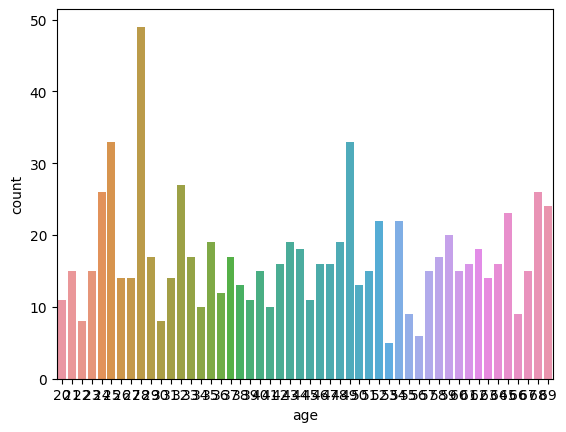

In [ ]:
sns.countplot(x = age.age, data = age)

In [ ]:
age_premium = user_logs[['premium', 'age']]

In [ ]:
a = age_premium.query('premium == True')

In [ ]:
b = age_premium.query('premium == False')

In [ ]:
sns.distplot(a.age)
sns.distplot(b.age)

In [ ]:
platform_premium = user_logs[['premium', 'platform']]


In [ ]:
platform_premium.query('premium == True')\
              .groupby('platform', as_index=False)\
              .agg({'premium':'count'})

In [ ]:
success_platform = logs[['platform', 'success']]

In [ ]:
success_platform.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [ ]:
age_platform = logs[['platform', 'success', 'age']]

In [ ]:
c = success_platform.query('success == True' and 'platform == "computer"')

In [ ]:
c

,platform,success
4,computer,True
7,computer,True
9,computer,True
11,computer,True
13,computer,True
...,...,...
4489,computer,True
4491,computer,True
4493,computer,True
4494,computer,True


In [ ]:
success_platform.query('success == True').value_counts()

platform  success
phone     True       2019
computer  True       1090
tablet    True        180
dtype: int64

In [ ]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [ ]:
client_success = logs[['client', 'success']]

In [ ]:
client_success

,client,success
0,40177,True
1,61468,True
2,35604,False
3,9961,True
4,10931,True
...,...,...
4495,64496,False
4496,73299,True
4497,8967,True
4498,52880,False


In [ ]:
pip = client_success.groupby('client', as_index=False)\
              .agg({'success':'count'})

In [ ]:
pip

,client,success
0,40,1
1,50,1
2,75,1
3,81,1
4,132,1
...,...,...
4006,99927,1
4007,99931,1
4008,99952,1
4009,99973,1


<ipython-input-136-dc94e9d82def>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pip.success)


<Axes: xlabel='success', ylabel='Density'>

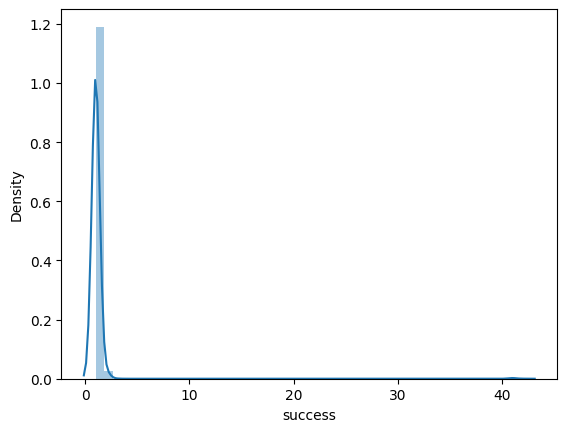

In [ ]:
sns.distplot(pip.success)

In [ ]:
client_success_max = client_success.query('success == True')\
              .groupby('client', as_index=False)\
              .agg({'success':'count'})\
              .sort_values('success')\
              .query('success == 41')\
              .sort_values('client')

In [ ]:
client_success_max.client.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [ ]:
client_success.query('success == True')\
              .groupby('client', as_index=False)\
              .agg({'success':'count'})\
              .sort_values('success')


,client,success
0,40,1
1882,65936,1
1883,66064,1
1884,66245,1
1885,66266,1
...,...,...
810,28719,41
1487,52870,41
1020,36165,41
2626,92584,41
